<img src="https://raw.github.com/emsig/logos/main/empymod/empymod-logo.png" width="400" alt="Logo empymod" title="Logo empymod">
    

### 3D EM modeller for 1D VTI media

The modeller **empymod** can compute electric or magnetic responses due to a 3D
electric or magnetic source in a layered-earth model with vertical transverse
isotropic (VTI) resistivity, VTI electric permittivity, and VTI magnetic
permeability, from very low frequencies (DC) to very high frequencies (GPR).
The computation is carried out in the wavenumber-frequency domain, and various
Hankel- and Fourier-transform methods are included to transform the responses
into the space-frequency and space-time domains.


- Manual: https://empymod.emsig.xyz
- Gallery: https://empymod.emsig.xyz/en/stable/gallery
- Code: https://github.com/emsig/empymod
- Installation: https://empymod.emsig.xyz/en/stable/manual/installation.html

In [7]:
# Uncomment on Google Colab
%pip install empymod matplotlib ipympl ipywidgets

In [8]:
import empymod

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

plt.style.use('ggplot')

# Comment this out on Google Colab
#%matplotlib widget

## Routines

At its heart, empymod has the Green's functions for x-, y-, and z-directed infinitesimal small electric and magnetic dipole sources and receivers (36 combinations), using recursively local and global reflection coefficients. It is based on [Hunziker et al., 2015, Geophysics](https://doi.org/10.1190/geo2013-0411.1).
- It is analytical in the wavenumber-frequency domain.
- For the wavenumber-to-space and frequency-to-time transformations there are various transformation methods, where the digital linear filter (DLF) is the default approach.
- Analytical full- and half-space solution in the frequency- and time-domain.

### Primary routines in empymod:

- `bipole`
- `dipole`
- `loop`
- `analytical`
- `dipole_k`

In [9]:
# Look at docs
empymod.bipole?

In [10]:
empymod.bipole(
    src=(0, 0, -250, 0, 0),
    rec=(1000, 0, -300, 0, 0),
    depth=[0, -300, -1000, -1100],
    res=[2e14, 0.3, 1, 100, 1],
    freqtime=1,
    verb=3,
)


:: empymod START  ::  v2.5.2

   depth       [m] :  -1100 -1000 -300 0
   res     [Ohm.m] :  1 100 1 0.3 2E+14
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  1
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  key_201_2009
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  -250
     > azimuth [°] :  0
     > dip     [°] :  0
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  1000
     > y       [m] :  0
     > z       [m] :  -300
     > azimuth [°] :  0
     > dip     [°] :  0
   Required ab's   :  11

:: empymod END; runtime = 0:00:30.441075 :: 1 kernel call(s)



EMArray(-8.09007211e-12-3.66256174e-11j)

## Basic example with numpy and matplotlib
A simple frequency-domain example, where we keep most of the parameters left at the default value:

First we define the survey parameters: source and receiver locations, and source frequencies.

In [11]:
# x-directed bipole source: x0, x1, y0, y1, z0, z1
source = [-50, 50, 0, 0, -250, -250]

# Source frequency
frequency_1 = 1

# Receiver offsets
offsets_1 = np.linspace(500, 10000, 301)

# x-directed dipole receiver-array: x, y, z, azimuth, dip
receivers_1 = [offsets_1, offsets_1*0, -300, 0, 0]

Next, we define the resistivity model:

In [12]:
# Layer boundaries
depth = [0, -300, -1000, -1050]

# Layer resistivities
resistivities = [2e14, 0.3, 1, 50, 1]

And finally we compute the electromagnetic response at receiver locations:

In [13]:
resp_1 = empymod.bipole(
    src=source,
    rec=receivers_1,
    depth=depth,
    res=resistivities,
    freqtime=frequency_1,
    htarg={'pts_per_dec': -1},
    verb=2,
)


:: empymod END; runtime = 0:00:00.282176 :: 1 kernel call(s)



Let’s plot the resulting responses:

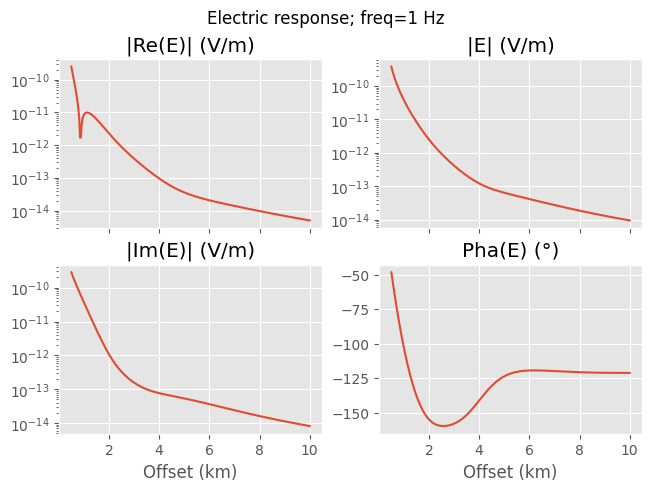

In [14]:
fig1, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, constrained_layout=True)

fig1.suptitle(f'Electric response; freq={frequency_1} Hz')

ax11.set_title('|Re(E)| (V/m)')
ax11.semilogy(offsets_1/1e3, abs(resp_1.real))

ax12.set_title('|E| (V/m)')
ax12.semilogy(offsets_1/1e3, resp_1.amp())

ax13.set_title('|Im(E)| (V/m)')
ax13.semilogy(offsets_1/1e3, abs(resp_1.imag))

ax14.set_title('Pha(E) (°)')
ax14.plot(offsets_1/1e3, resp_1.pha(deg=True))

for ax in [ax13, ax14]:
    ax.set_xlabel('Offset (km)')

## As a function of frequency instead of offset

In [15]:
frequency_2 = np.logspace(-2, 2, 200)
offsets_2 = 3000.0
receivers_2 = [offsets_2, offsets_2*0, -200, 0, 0]

resp_2 = empymod.bipole(
    src=source,
    rec=receivers_2,
    depth=depth,
    res=resistivities,
    freqtime=frequency_2,
    htarg={'pts_per_dec': -1},
    verb=2,
)


:: empymod END; runtime = 0:00:00.281692 :: 200 kernel call(s)



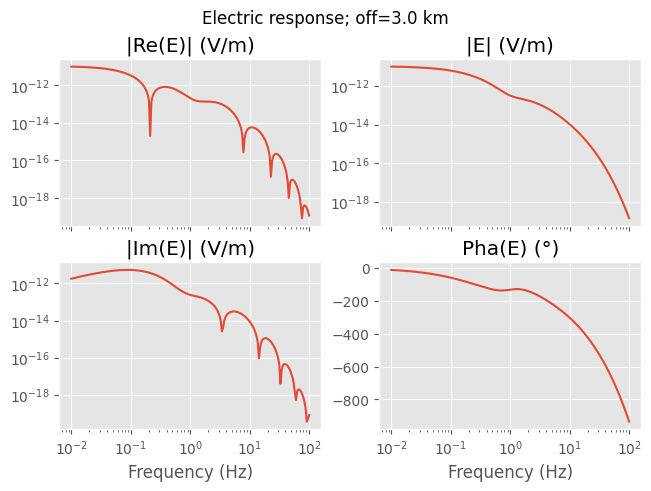

In [16]:
fig2, ((ax21, ax22), (ax23, ax24)) = plt.subplots(2, 2, sharex=True, constrained_layout=True)

fig2.suptitle(f'Electric response; off={offsets_2/1e3} km')

ax21.set_title('|Re(E)| (V/m)')
ax21.loglog(frequency_2, abs(resp_2.real))

ax22.set_title('|E| (V/m)')
ax22.loglog(frequency_2, resp_2.amp())

ax23.set_title('|Im(E)| (V/m)')
ax23.loglog(frequency_2, abs(resp_2.imag))

ax24.set_title('Pha(E) (°)')
ax24.semilogx(frequency_2, resp_2.pha(deg=True))

for ax in [ax23, ax24]:
    ax.set_xlabel('Frequency (Hz)')

## Using input dictionaries

=> Makes it easy to compare different models keeping most parameters constant

We use this simple example also to play around with, e.g.:

- `signal`
- `msrc`, `mrec`
- `aniso`
- `eperm{H;V}`
- `mperm{H;V}`

In [17]:
inp = {
    'src': source,
    #'src': (*source[:3], 90, 0),
    'rec': receivers_1,
    #'rec': (*receivers_1[:3], 90, 0),
    #'aniso': [1, 1, 2, 2, 2],
    'depth': depth,
    'freqtime': frequency_1,
    #'signal': 0,
    #'msrc': True,
    #'mrec': True,
    'htarg': {'pts_per_dec': -1},
    'verb': 1,
}

resp_1_tg = empymod.bipole(res=resistivities, **inp)
resp_1_bg = empymod.bipole(res=[2e14, 0.3, 1, 1, 1], **inp)
#resp_1_bg = empymod.bipole(res=resistivities, epermH=[1, 1, 80, 80, 80], **inp)

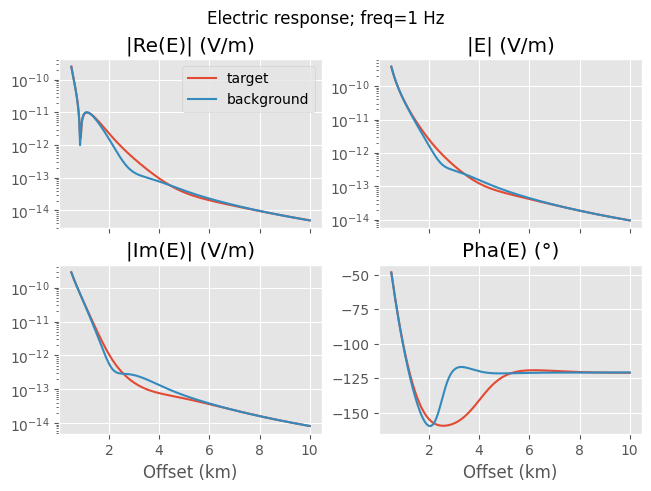

In [18]:
fig3, ((ax31, ax32), (ax33, ax34)) = plt.subplots(2, 2, sharex=True, constrained_layout=True)

fig3.suptitle(f'Electric response; freq={frequency_1} Hz')

ax31.set_title('|Re(E)| (V/m)')
ax31.semilogy(offsets_1/1e3, abs(resp_1_tg.real), label='target')
ax31.semilogy(offsets_1/1e3, abs(resp_1_bg.real), label='background')
ax31.legend()

ax32.set_title('|E| (V/m)')
ax32.semilogy(offsets_1/1e3, resp_1_tg.amp())
ax32.semilogy(offsets_1/1e3, resp_1_bg.amp())

ax33.set_title('|Im(E)| (V/m)')
ax33.semilogy(offsets_1/1e3, abs(resp_1_tg.imag))
ax33.semilogy(offsets_1/1e3, abs(resp_1_bg.imag))

ax34.set_title('Pha(E) (°)')
ax34.plot(offsets_1/1e3, resp_1_tg.pha(deg=True))
ax34.plot(offsets_1/1e3, resp_1_bg.pha(deg=True))

for ax in [ax33, ax34]:
    ax.set_xlabel('Offset (km)')

### Save/load input & CLI

See https://empymod.emsig.xyz/en/stable/manual/iocli.html

In [19]:
empymod.io.save_input('myrun.json', {'res': resistivities, **inp})

In [20]:
inp_loaded = empymod.io.load_input('myrun.json')

In [21]:
%%bash

empymod --help

usage: empymod [-h] [--report] [--version]
               [{bipole,dipole,loop,analytical}] [input] [output]

3D electromagnetic modeller for 1D VTI media.

positional arguments:
  {bipole,dipole,loop,analytical}
                        name of the modelling routine
  input                 input file name
  output                output file name; prints to STDOUT if not provided

options:
  -h, --help            show this help message and exit
  --report              show the empymod report and exit
  --version             show the empymod version and exit


In [22]:
!cat myrun.json

{
  "res": [200000000000000.0, 0.3, 1, 50, 1],
  "src": [-50, 50, 0, 0, -250, -250],
  "rec": [[500.0, 531.6666666666666, 563.3333333333334, 595.0, 626.6666666666666, 658.3333333333334, 690.0, 721.6666666666667, 753.3333333333334, 785.0, 816.6666666666667, 848.3333333333334, 880.0, 911.6666666666667, 943.3333333333334, 975.0, 1006.6666666666667, 1038.3333333333335, 1070.0, 1101.6666666666667, 1133.3333333333335, 1165.0, 1196.6666666666667, 1228.3333333333335, 1260.0, 1291.6666666666667, 1323.3333333333335, 1355.0, 1386.6666666666667, 1418.3333333333335, 1450.0, 1481.6666666666667, 1513.3333333333335, 1545.0, 1576.6666666666667, 1608.3333333333335, 1640.0, 1671.6666666666667, 1703.3333333333335, 1735.0, 1766.6666666666667, 1798.3333333333335, 1830.0, 1861.6666666666667, 1893.3333333333335, 1925.0, 1956.6666666666667, 1988.3333333333335, 2020.0, 2051.666666666667, 2083.3333333333335, 2115.0, 2146.666666666667, 2178.3333333333335, 2210.0, 2241.666666666667, 2273.3333333333335, 2305.0, 233

In [23]:
%%bash

empymod bipole myrun.json output.json

In [24]:
empymod.io.load_data('output.json')

EMArray([[[ 2.51617759e-10-2.82952337e-10j],
          [ 1.88528218e-10-2.43987310e-10j],
          [ 1.41330546e-10-2.11380087e-10j],
          [ 1.05664656e-10-1.83876468e-10j],
          [ 7.84882385e-11-1.60508441e-10j],
          [ 5.76401779e-11-1.40524330e-10j],
          [ 4.15620471e-11-1.23335025e-10j],
          [ 2.91170660e-11-1.08474278e-10j],
          [ 1.94659488e-11-9.55700363e-11j],
          [ 1.19795635e-11-8.43219970e-11j],
          [ 6.18366985e-12-7.44860740e-11j],
          [ 1.71472333e-12-6.58614129e-11j],
          [-1.70687762e-12-5.82817217e-11j],
          [-4.29941657e-12-5.16077278e-11j],
          [-6.23360635e-12-4.57221534e-11j],
          [-7.64478286e-12-4.05252953e-11j],
          [-8.64014004e-12-3.59318729e-11j],
          [-9.30565274e-12-3.18686475e-11j],
          [-9.71008563e-12-2.82720357e-11j],
          [-9.90894804e-12-2.50870244e-11j],
          [-9.94701046e-12-2.22654868e-11j],
          [-9.86041256e-12-1.97652047e-11j],
          

## Interactive

Small example how to create a simple interactive example.

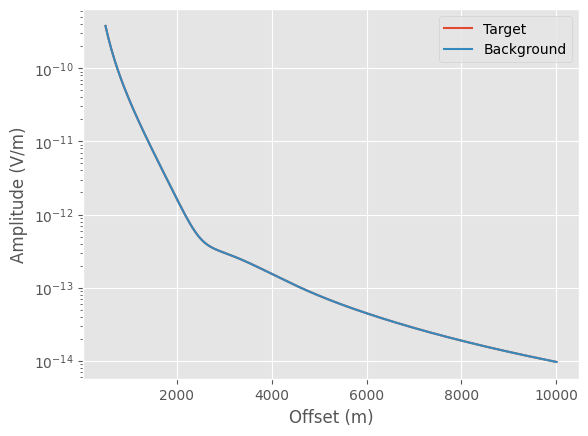

interactive(children=(FloatSlider(value=0.0, description='res', max=2.0, min=-2.0), Output()), _dom_classes=('…

In [25]:
fig4, ax41 = plt.subplots()
ax41.set_ylabel('Amplitude (V/m)')
ax41.set_xlabel('Offset (m)')
ax41.set_yscale('log')

ax41.plot(offsets_1, resp_1_bg.amp(), label='Target')
ax41.plot(offsets_1, resp_1_bg.amp(), label='Background')
ax41.legend()

def f(res):
    update_resp = empymod.bipole(res=[2e14, 0.3, 1, 10**res, 1], **inp)
    ax41.set_title(f"Resistivity: {10**res: 6.2f} Ω m")
    ax41.lines[0].set_ydata(update_resp.amp())

interact(f, res=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0));

## Other topics:

- TLE notebook (if time, run it!)
- WalkTEM & [Gallery](https://empymod.emsig.xyz/en/stable/gallery) in general
- Induced Polarization
- Loops
- Ziolkowski and Slob

## Keep in mind

empymod is very useful to quickly check ideas, concepts, and learn about the field.

However, keep in mind that it is only for layered models: You will almost always get an exagerated response in comparison with reality!

In [26]:
# Check the report - can be useful
empymod.Report()

--------------------------------------------------------------------------------
  Date: Mon Jan 05 13:11:16 2026 UTC

                OS : Linux (Ubuntu 22.04)
            CPU(s) : 2
           Machine : x86_64
      Architecture : 64bit
               RAM : 12.7 GiB
       Environment : IPython

  Python 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

             numpy : 2.0.2
             scipy : 1.16.3
             numba : 0.60.0
           empymod : 2.5.2
            libdlf : 0.3.0
           IPython : 7.34.0
        matplotlib : 3.10.0
--------------------------------------------------------------------------------